# Avances realizados en el TFG

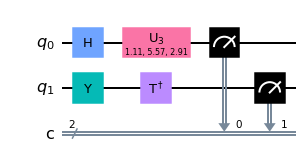

In [1]:
#1: Circuitos random!!!!!!

from qiskit.circuit.random import random_circuit

circ = random_circuit(2, 2, measure=True)
circ.draw(output='mpl')


In [2]:
circ.data


[(Instruction(name='y', num_qubits=1, num_clbits=0, params=[]), [Qubit(QuantumRegister(2, 'q'), 1)], []), (Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), [Qubit(QuantumRegister(2, 'q'), 0)], []), (Instruction(name='u3', num_qubits=1, num_clbits=0, params=[1.1135929174711268, 5.571336795738711, 2.909613245516824]), [Qubit(QuantumRegister(2, 'q'), 0)], []), (Instruction(name='tdg', num_qubits=1, num_clbits=0, params=[]), [Qubit(QuantumRegister(2, 'q'), 1)], []), (Instruction(name='measure', num_qubits=1, num_clbits=1, params=[]), [Qubit(QuantumRegister(2, 'q'), 0)], [Clbit(ClassicalRegister(2, 'c'), 0)]), (Instruction(name='measure', num_qubits=1, num_clbits=1, params=[]), [Qubit(QuantumRegister(2, 'q'), 1)], [Clbit(ClassicalRegister(2, 'c'), 1)])]

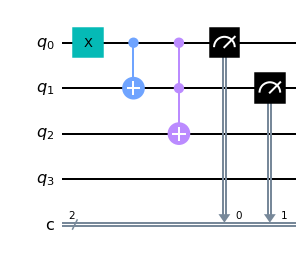

In [3]:
# Creamos un circuito de pruebas
from qiskit import QuantumCircuit

circuit = QuantumCircuit(4, 2)
circuit.x(0)
circuit.cx(0, 1)
circuit.ccx(0,1,2)
circuit.measure([0,1], [0,1])
circuit.draw('mpl')



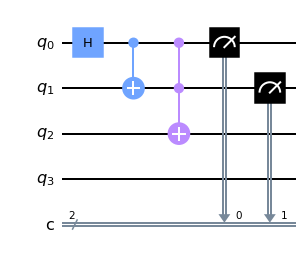

In [6]:
def swap(circ,gate1,gate2):
    """
    Cambia dos puertas, de momento puertas que afecten al mismo num de qbits
    """
    for i in range(circ.size()):
        if circ.data[i][0].name == gate1:
            circ.data[i][0].name = gate2
            
swap(circuit,'x','h')
circuit.draw('mpl')

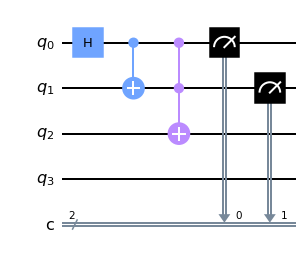

In [7]:
swap(circuit,'cx','h')
circuit.draw('mpl')

Lista de ideas:
- Función que al pasarle un circuito meta un mutante aleatorio, es decir cambie 1 el numero de puertas que quieras por una puerta aleatoria, esta puerta introducida puede afectar al mismo numero de bits o a una cantidad distinta. La puerta se elige igual que en el modulo de random gates
- Predefinir mutantes para cada puerta simulando errores comunes de programador (?)



In [8]:
from qiskit import QuantumCircuit
from qiskit.circuit import Instruction

class Placeholder(Instruction):
    def __init__(self, num_qubits, label):
        self.name = "placeholder"
        super().__init__(self.name, num_qubits, 0, [], label = label)

    def inverse(self):
        return Placeholder(self.name, self.num_qubits)
    
# You can define this function to take a dictionary of label-instruction pairs.
# You can also define it to accept a QuantumCircuit in addition to single instructions
def replace(self, placeholder_label, instruction: Instruction):
    self._data = [(instruction, _inst[1], _inst[2]) if _inst[0].name == 'placeholder' and _inst[0].label == placeholder_label else _inst for _inst in self._data]

QuantumCircuit.replace = replace

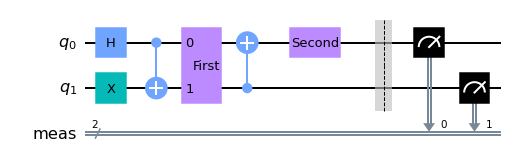

In [9]:
circ = QuantumCircuit(2)
circ.h(0)
circ.x(1)
circ.cx(0, 1)
circ.append(Placeholder(2, 'First'), [0, 1])
circ.cx(1, 0)
circ.append(Placeholder(1, 'Second'), [0])
circ.measure_all()
circ.draw('mpl')

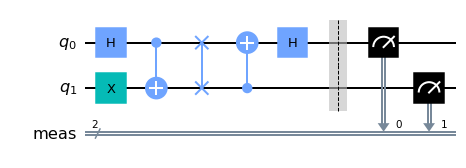

In [10]:
from qiskit.circuit.library import HGate, SwapGate, XGate

circ.replace('First', SwapGate())
circ.replace('Second', HGate())
circ.replace(HGate,XGate)
circ.draw('mpl')

- Operadores:
-Cambiar puertas de orden
-Cambiar una puerta por otra mismo num de qbits diccionario
-Cambiar una puerta por otra distinto num qbits
-Aumentar numero de qbits afectados por una puertas (quito y añado UNO aleatorio)

{'H':'X'}


Lista de pares -> 
mi programa busca 

Clase operador de mutacion
metodo que dado un circuito devuelve otro circuito
clase abstracta

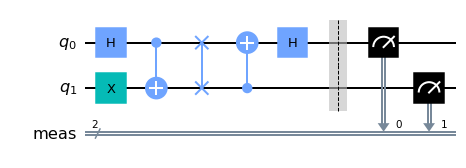

In [11]:
circ.draw('mpl')

In [12]:
circ._data

[(Instruction(name='h', num_qubits=1, num_clbits=0, params=[]),
  [Qubit(QuantumRegister(2, 'q'), 0)],
  []),
 (Instruction(name='x', num_qubits=1, num_clbits=0, params=[]),
  [Qubit(QuantumRegister(2, 'q'), 1)],
  []),
 (Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]),
  [Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)],
  []),
 (Instruction(name='swap', num_qubits=2, num_clbits=0, params=[]),
  [Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)],
  []),
 (Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]),
  [Qubit(QuantumRegister(2, 'q'), 1), Qubit(QuantumRegister(2, 'q'), 0)],
  []),
 (Instruction(name='h', num_qubits=1, num_clbits=0, params=[]),
  [Qubit(QuantumRegister(2, 'q'), 0)],
  []),
 (Instruction(name='barrier', num_qubits=2, num_clbits=0, params=[]),
  [Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)],
  []),
 (Instruction(name='measure', num_qubits=1, num_clbits=1, params=[]),
  [Qubit(

In [13]:
circ._data = [(Instruction(name='h', num_qubits=1, num_clbits=0, params=[]),
  [Qubit(QuantumRegister(2, 'q'), 0)],
  []),
 (Instruction(name='x', num_qubits=1, num_clbits=0, params=[]),
  [Qubit(QuantumRegister(2, 'q'), 1)],
  []),
 (Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]),
  [Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)],
  []),
 (Instruction(name='swap', num_qubits=2, num_clbits=0, params=[]),
  [Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)],
  []),
 (Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]),
  [Qubit(QuantumRegister(2, 'q'), 1), Qubit(QuantumRegister(2, 'q'), 0)],
  []),
 (Instruction(name='h', num_qubits=1, num_clbits=0, params=[]),
  [Qubit(QuantumRegister(2, 'q'), 0)],
  []),
 (Instruction(name='barrier', num_qubits=2, num_clbits=0, params=[]),
  [Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)],
  []),
 (Instruction(name='measure', num_qubits=1, num_clbits=1, params=[]),
  [Qubit(QuantumRegister(2, 'q'), 0)],
  [Clbit(ClassicalRegister(2, 'meas'), 0)]),
 (Instruction(name='measure', num_qubits=1, num_clbits=1, params=[]),
  [Qubit(QuantumRegister(2, 'q'), 1)],
  [Clbit(ClassicalRegister(2, 'meas'), 1)])]

NameError: name 'Qubit' is not defined

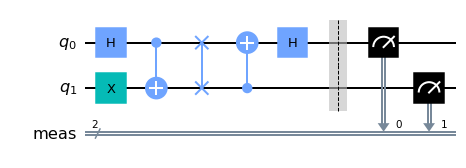

In [14]:
circ.draw('mpl')

In [15]:
circ2 = QuantumCircuit(4,3)


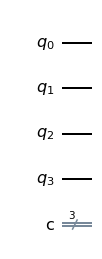

In [16]:
circ2.draw('mpl')


In [17]:
circ2.data

[]

In [18]:
from qiskit.circuit import Instruction, Qubit, QuantumRegister

In [19]:
(Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), [Qubit(QuantumRegister(2, 'q'), 0)], [])


(Instruction(name='h', num_qubits=1, num_clbits=0, params=[]),
 [Qubit(QuantumRegister(2, 'q'), 0)],
 [])

In [38]:
circ2.data=[(Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), [Qubit(QuantumRegister(2, 'q'), 0)], [])]


CircuitError: 'qargs not in this circuit'

In [20]:
from qiskit.circuit import Clbit, ClassicalRegister

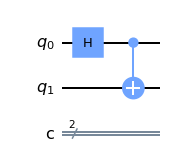

In [21]:
qc1 = QuantumCircuit(2,2)
qc1.h(0)
qc1.cx(0,1)
qc1.draw('mpl')

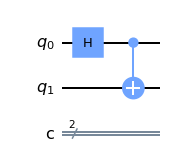

In [22]:
qc2 = QuantumCircuit(2,2)
qc2.data = qc1.data
qc2.draw('mpl')

In [23]:
qc1 == qc2

True

In [24]:
qc1.data

[(Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), [Qubit(QuantumRegister(2, 'q'), 0)], []), (Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), [Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)], [])]

In [25]:
qc3 = QuantumCircuit(2,2)
qc3.data = [(Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), [Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)], []), (Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), [Qubit(QuantumRegister(2, 'q'), 0)], [])]

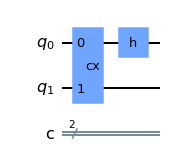

In [26]:
qc3.draw('mpl')

In [27]:
qc4 = QuantumCircuit(2,2)

In [28]:
qc4.cx(0,1)
qc4.h(0)
qc4.data

[(Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), [Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)], []), (Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), [Qubit(QuantumRegister(2, 'q'), 0)], [])]

In [29]:
qc3.data

[(Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), [Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)], []), (Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), [Qubit(QuantumRegister(2, 'q'), 0)], [])]

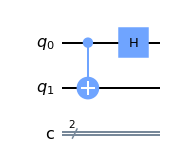

In [30]:
qc4.draw('mpl')

In [31]:
qc3.data[0] == qc4.data[0]

False